In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import struct
import sys
from array import array
import itertools
import os
import sys
from scipy import signal
from scipy.optimize import curve_fit
import subprocess
import shutil
import pandas as pd
pi = np.pi
clight = 299792458

In [29]:
working_folder = 'bench/'
home0 = os.getcwd()
home1 = os.path.join(home0,working_folder)
cwd = working_folder#os.path.join(home0,working_folder)


In [45]:
resultfn = 'ImOmega13551.txt'
resultfn = os.path.join(cwd,resultfn)
data = pd.read_csv(resultfn,header=[0,1])
data= data.dropna(axis=1)
haxis = np.sort([float(i) for i in data.columns.levels[0][:-1]])
haxis2 = np.sort([float(i) for i in data.columns.levels[1][:-1]])

In [46]:
resultfn = 'ReOmega13551.txt'
resultfn = os.path.join(cwd,resultfn)
dataRe = pd.read_csv(resultfn,header=[0,1])
dataRe= dataRe.dropna(axis=1)


In [47]:
np.sort(data.columns.levels[0][:-1])

array(['-102000', '-105000', '-108000', '-111000', '-114000', '-117000',
       '-12000', '-120000', '-123000', '-126000', '-129000', '-132000',
       '-135000', '-138000', '-141000', '-144000', '-147000', '-15000',
       '-150000', '-18000', '-21000', '-24000', '-27000', '-3000',
       '-30000', '-33000', '-36000', '-39000', '-42000', '-45000',
       '-48000', '-51000', '-54000', '-57000', '-6000', '-60000',
       '-63000', '-66000', '-69000', '-72000', '-75000', '-78000',
       '-81000', '-84000', '-87000', '-9000', '-90000', '-93000',
       '-96000', '-99000', '0', '102000', '105000', '108000', '111000',
       '114000', '117000', '12000', '120000', '123000', '126000',
       '129000', '132000', '135000', '138000', '141000', '144000',
       '147000', '15000', '18000', '21000', '24000', '27000', '3000',
       '30000', '33000', '36000', '39000', '42000', '45000', '48000',
       '51000', '54000', '57000', '6000', '60000', '63000', '66000',
       '69000', '72000', '75000', '7

In [48]:
data

,-150000,-147000,-144000,-141000,-138000,-135000,-132000,-129000,-126000,-123000,...,120000,123000,126000,129000,132000,135000,138000,141000,144000,147000
,-150000,-147000,-144000,-141000,-138000,-135000,-132000,-129000,-126000,-123000,...,120000,123000,126000,129000,132000,135000,138000,141000,144000,147000
0.045562,-4.317160e-09,-4.594450e-09,-4.895360e-09,-5.222460e-09,-5.578660e-09,-5.967270e-09,-6.392060e-09,-6.857330e-09,-7.368030e-09,-7.929820e-09,...,8.873380e-09,8.248970e-09,7.682560e-09,7.167580e-09,6.698300e-09,6.269780e-09,5.877670e-09,5.518200e-09,5.188020e-09,4.884230e-09
0.091123,-1.726840e-08,-1.837760e-08,-1.958120e-08,-2.088960e-08,-2.231440e-08,-2.386890e-08,-2.556800e-08,-2.742910e-08,-2.947180e-08,-3.171900e-08,...,3.549330e-08,3.299560e-08,3.073000e-08,2.867010e-08,2.679300e-08,2.507890e-08,2.351050e-08,2.207260e-08,2.075190e-08,1.953670e-08
0.136685,-3.885350e-08,-4.134910e-08,-4.405730e-08,-4.700110e-08,-5.020690e-08,-5.370440e-08,-5.752740e-08,-6.171480e-08,-6.631100e-08,-7.136720e-08,...,7.985930e-08,7.423960e-08,6.914200e-08,6.450720e-08,6.028370e-08,5.642710e-08,5.289810e-08,4.966290e-08,4.669130e-08,4.395720e-08
0.182247,-6.907200e-08,-7.350860e-08,-7.832310e-08,-8.355660e-08,-8.925570e-08,-9.547340e-08,-1.022700e-07,-1.097140e-07,-1.178850e-07,-1.268740e-07,...,1.419710e-07,1.319800e-07,1.229180e-07,1.146780e-07,1.071700e-07,1.003140e-07,9.404020e-08,8.828870e-08,8.300600e-08,7.814530e-08
0.227809,-1.079240e-07,-1.148560e-07,-1.223780e-07,-1.305560e-07,-1.394600e-07,-1.491760e-07,-1.597950e-07,-1.714270e-07,-1.841940e-07,-1.982380e-07,...,2.218280e-07,2.062180e-07,1.920580e-07,1.791830e-07,1.674520e-07,1.567390e-07,1.469360e-07,1.379500e-07,1.296960e-07,1.221010e-07
0.273370,-1.554080e-07,-1.653900e-07,-1.762230e-07,-1.879980e-07,-2.008210e-07,-2.148100e-07,-2.301020e-07,-2.468520e-07,-2.652360e-07,-2.854600e-07,...,3.194290e-07,2.969510e-07,2.765610e-07,2.580220e-07,2.411280e-07,2.257020e-07,2.115860e-07,1.986460e-07,1.867600e-07,1.758230e-07
0.318932,-2.115250e-07,-2.251110e-07,-2.398550e-07,-2.558830e-07,-2.733360e-07,-2.923770e-07,-3.131910e-07,-3.359890e-07,-3.610120e-07,-3.885390e-07,...,4.347740e-07,4.041790e-07,3.764260e-07,3.511930e-07,3.281990e-07,3.072020e-07,2.879900e-07,2.703760e-07,2.541980e-07,2.393120e-07
0.364494,-2.762730e-07,-2.940190e-07,-3.132760e-07,-3.342100e-07,-3.570060e-07,-3.818760e-07,-4.090610e-07,-4.388370e-07,-4.715200e-07,-5.074740e-07,...,5.678630e-07,5.279020e-07,4.916540e-07,4.586960e-07,4.286640e-07,4.012390e-07,3.761460e-07,3.531400e-07,3.320100e-07,3.125670e-07
0.410056,-3.496530e-07,-3.721120e-07,-3.964850e-07,-4.229780e-07,-4.518290e-07,-4.833050e-07,-5.177110e-07,-5.553960e-07,-5.967600e-07,-6.422640e-07,...,7.186940e-07,6.681190e-07,6.222430e-07,5.805310e-07,5.425220e-07,5.078130e-07,4.760540e-07,4.469380e-07,4.201950e-07,3.955890e-07


In [49]:
haxis2

array([-150000., -147000., -144000., -141000., -138000., -135000.,
       -132000., -129000., -126000., -123000., -120000., -117000.,
       -114000., -111000., -108000., -105000., -102000.,  -99000.,
        -96000.,  -93000.,  -90000.,  -87000.,  -84000.,  -81000.,
        -78000.,  -75000.,  -72000.,  -69000.,  -66000.,  -63000.,
        -60000.,  -57000.,  -54000.,  -51000.,  -48000.,  -45000.,
        -42000.,  -39000.,  -36000.,  -33000.,  -30000.,  -27000.,
        -24000.,  -21000.,  -18000.,  -15000.,  -12000.,   -9000.,
         -6000.,   -3000.,       0.,    3000.,    6000.,    9000.,
         12000.,   15000.,   18000.,   21000.,   24000.,   27000.,
         30000.,   33000.,   36000.,   39000.,   42000.,   45000.,
         48000.,   51000.,   54000.,   57000.,   60000.,   63000.,
         66000.,   69000.,   72000.,   75000.,   78000.,   81000.,
         84000.,   87000.,   90000.,   93000.,   96000.,   99000.,
        102000.,  105000.,  108000.,  111000.,  114000.,  1170

In [56]:
i

'-102000'

In [57]:
data[i]

,-102000
0.045562,-1.400260e-08
0.091123,-5.601000e-08
0.136685,-1.260220e-07
0.182247,-2.240370e-07
0.227809,-3.500550e-07
0.273370,-5.040740e-07
0.318932,-6.860940e-07
0.364494,-8.961130e-07
0.410056,-1.134130e-06
0.455617,-1.400140e-06


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

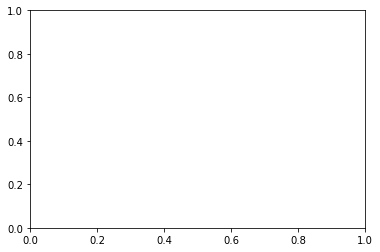

In [53]:
for i in data.columns.levels[0][:-1]:
    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(haxis2,data[i].iloc[0],'x-')
    axes1.axhline(y = 0,linewidth = 2,color='g')
    axes1.set_xlabel("df (Hz)")
    axes1.legend(['df = '+i],fontsize=20)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    #fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
    #plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

IndexError: single positional indexer is out-of-bounds

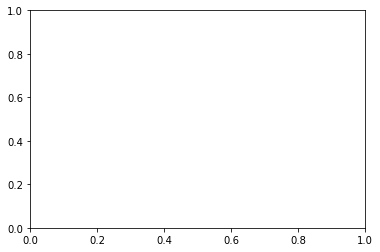

In [11]:
for i in dataRe.columns.levels[0][:-1]:
    fig1,axes1 = plt.subplots(1,1)
    axes1.plot(haxis2,dataRe[i].iloc[0],'x-')
    axes1.axhline(y = 0,linewidth = 2,color='g')
    axes1.set_xlabel("df2 (Hz)")
    axes1.legend(['df1 = '+i],fontsize=20)
    fig1.set_figheight(15)
    fig1.set_figwidth(30)

    #fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
    #plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

TypeError: Length of x (100) must match number of columns in z (99)

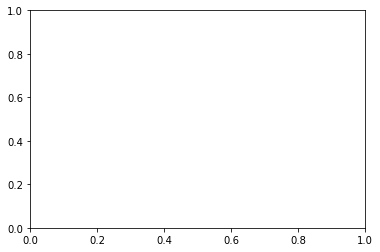

In [55]:
damp = 0
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(haxis,data.index.values,data.values-damp,levels=[-1e10,0,1e10],colors=['g','r'],antialiased=False)

#axes1.axvline(x = -2052.158283362134,linewidth = 2,color='b')
#axes1.axvline(x = -19900,linewidth = 2,color='y')
#axes1.axvline(x = -22800,linewidth = 2,color='y')
#axes1.axvline(x = -68000,linewidth = 2,color='y')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [11]:
approxresultfn = 'ApproxImOmega0.txt'
approxresultfn = os.path.join(cwd,approxresultfn)
approxdata = pd.read_csv(approxresultfn)
approxdata= approxdata.dropna(axis=1)
haxis = [float(i) for i in approxdata.columns]

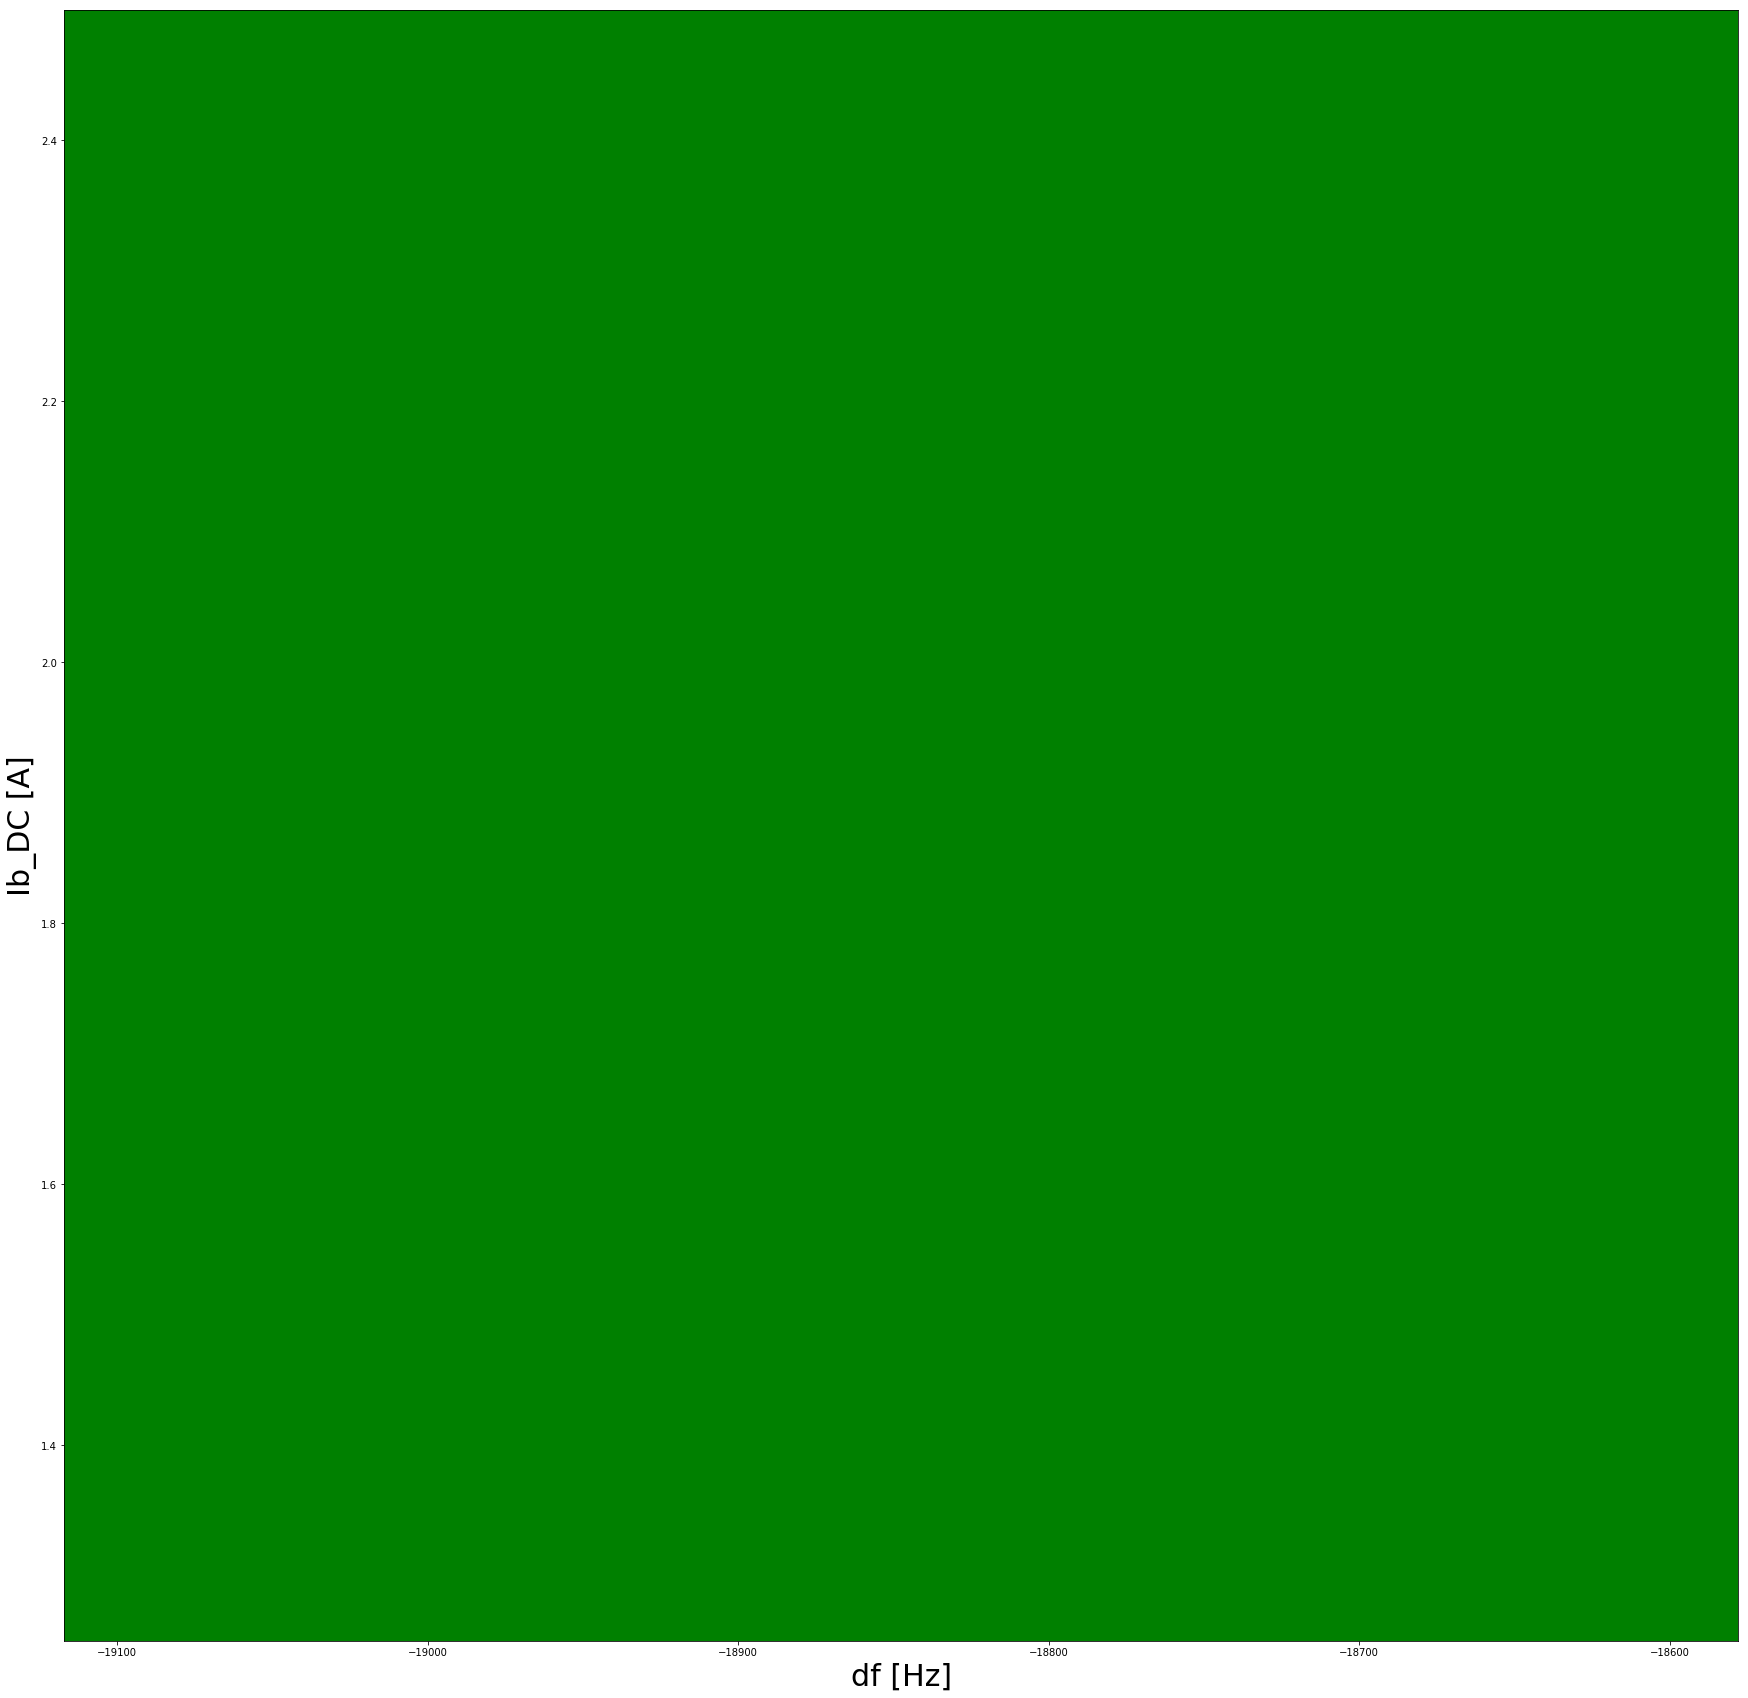

In [12]:
damp = 0
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(haxis,approxdata.index.values,approxdata.values-damp,levels=[-1e10,0,1e10],colors=['g','r'])
#axes1.contour(haxis,approxdata.index.values,approxdata.values-damp,levels=[-1e10,0,1e10])

#axes1.axvline(x = 0,linewidth = 2,color='b')
#axes1.axvline(x = -19900,linewidth = 2,color='y')
#axes1.axvline(x = -22800,linewidth = 2,color='y')
#axes1.axvline(x = -68000,linewidth = 2,color='y')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'approxstability_map_mu_0.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

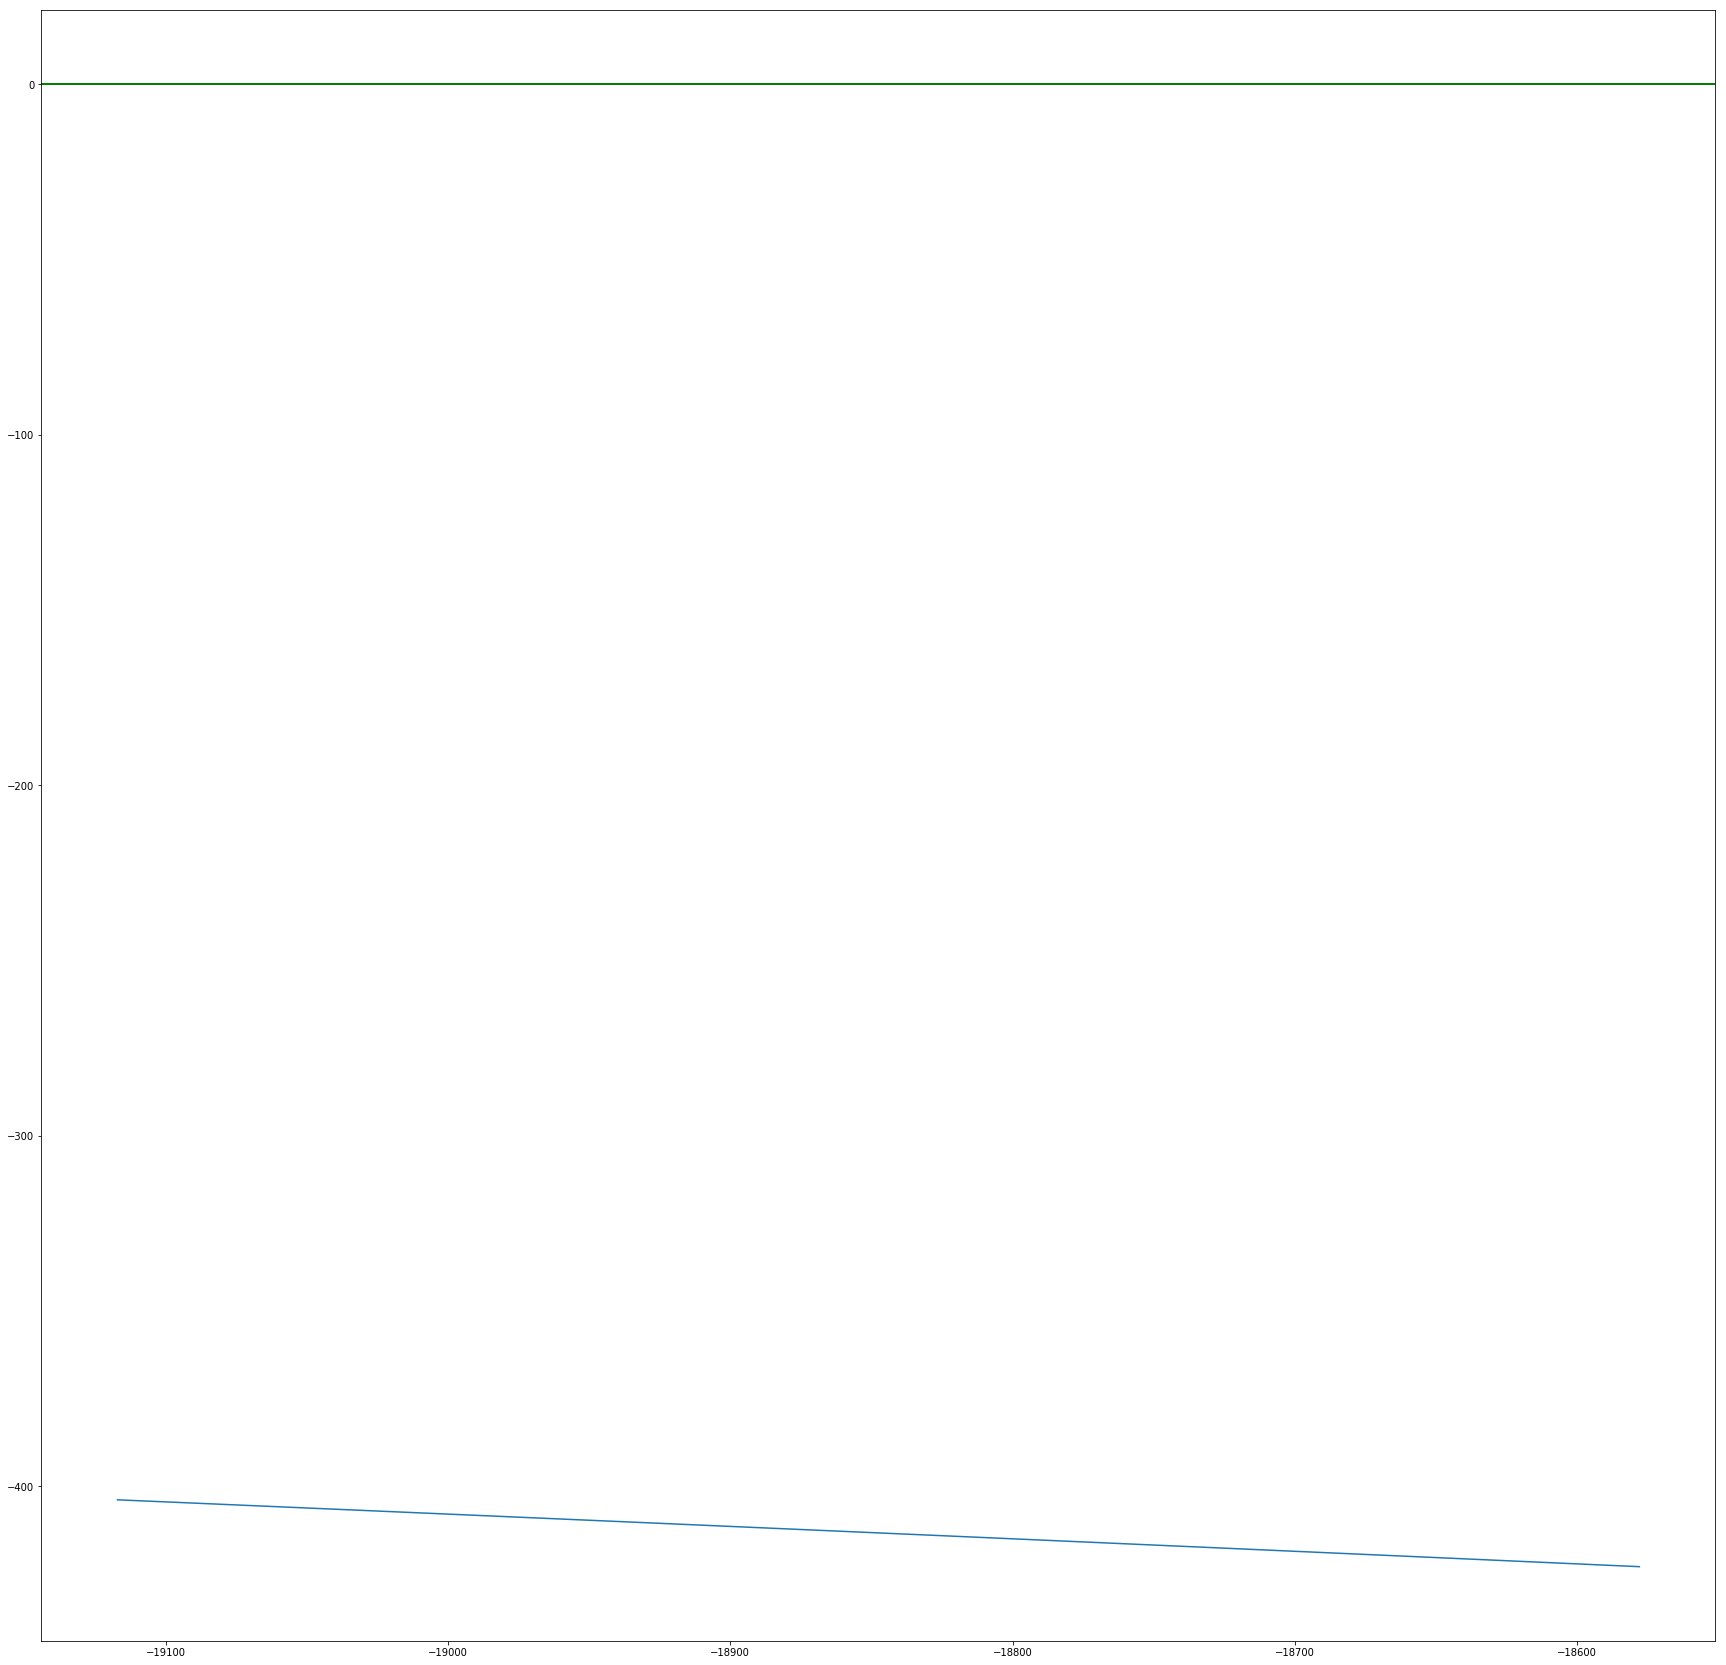

In [15]:
fig1,axes1 = plt.subplots(1,1)
axes1.plot(haxis,approxdata.iloc[0].values)

#axes1.axvline(x = 0,linewidth = 2,color='b')
#axes1.axvline(x = -19900,linewidth = 2,color='y')
#axes1.axvline(x = -20790,linewidth = 2,color='g')
#axes1.axvline(x = -68000,linewidth = 2,color='r')

axes1.axhline(y = 0,linewidth = 2,color='g')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
#axes1.set_ylabel('Ib_DC [A]',fontsize=30)
#axes1.set_xlabel('df [Hz]',fontsize=30)

#fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
#plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

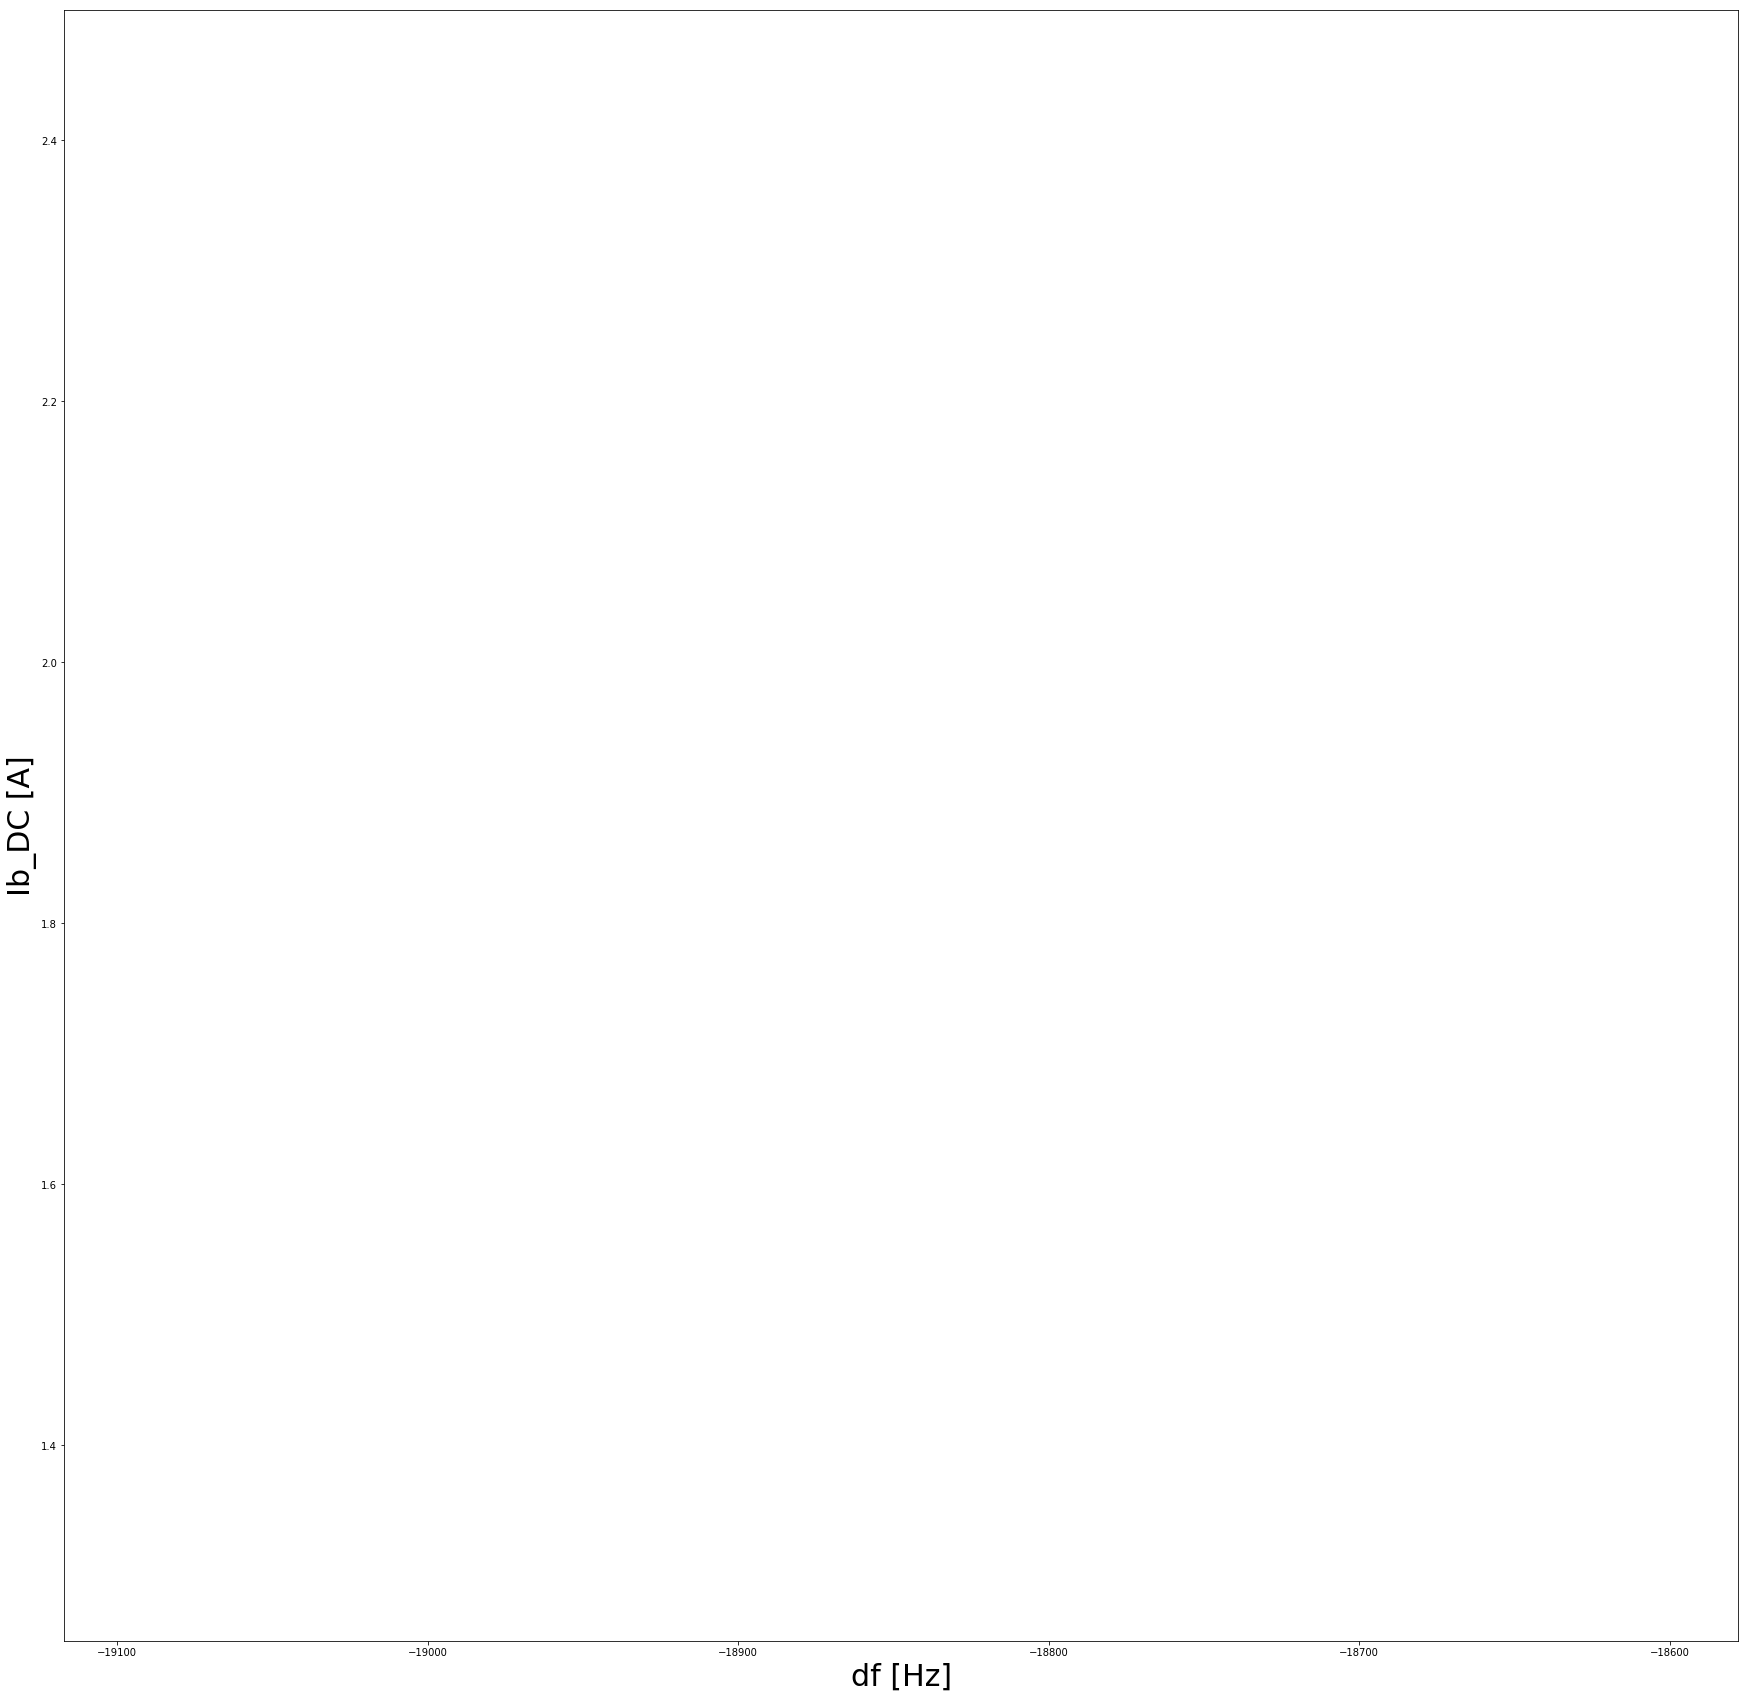

In [14]:
damp = 0
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(haxis,approxdata.index.values,approxdata.values-data.values,levels=[-1e1,0,1e10],colors=['g','r'])
#axes1.contour(haxis,approxdata.index.values,approxdata.values-damp,levels=[-1e10,0,1e10])

#axes1.axvline(x = 0,linewidth = 2,color='b')
#axes1.axvline(x = -19900,linewidth = 2,color='y')
#axes1.axvline(x = -22800,linewidth = 2,color='y')
#axes1.axvline(x = -68000,linewidth = 2,color='y')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'approx_iter_differentce_stability_map_mu_0.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.plot(haxis,data.iloc[0].values-approxdata.iloc[0].values)

axes1.axvline(x = 0,linewidth = 2,color='b')
#axes1.axvline(x = -19900,linewidth = 2,color='y')
#axes1.axvline(x = -20790,linewidth = 2,color='g')
#axes1.axvline(x = -68000,linewidth = 2,color='r')

axes1.axhline(y = 0,linewidth = 2,color='g')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
#axes1.set_ylabel('Ib_DC [A]',fontsize=30)
#axes1.set_xlabel('df [Hz]',fontsize=30)

#fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
#plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [ ]:
resultfn = 'ImOmega1259.txt'
resultfn = os.path.join(cwd,resultfn)
data2 = pd.read_csv(resultfn)
data2= data2.dropna(axis=1)
haxis = [float(i) for i in data2.columns]

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(haxis,data2.index.values,data2.values-0,levels=[-1e10,0,1e10],colors=['g','r'])

axes1.axvline(x = 0,linewidth = 2,color='b')
axes1.axvline(x = -19900,linewidth = 2,color='y')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'stability_map_mu_1259.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.plot(haxis,data2.iloc[-1].values-damp)

axes1.axvline(x = 0,linewidth = 2,color='b')
axes1.axvline(x = -19900,linewidth = 2,color='y')
axes1.axvline(x = -20790,linewidth = 2,color='g')
axes1.axhline(y = 0,linewidth = 2,color='g')

#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
#axes1.set_ylabel('Ib_DC [A]',fontsize=30)
#axes1.set_xlabel('df [Hz]',fontsize=30)

#fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
#plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

Debug Zone

In [ ]:
resultfn = 'ImOmega_serial .txt'
resultfn = os.path.join(cwd,resultfn)
data = pd.read_csv(resultfn)


In [ ]:
a= data.dropna(axis=1)

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(a.columns,a.index,a.values,levels=[-1e10,0,1e10],colors=['g','r'])

axes1.axvline(x = len(a.columns)/2.0-0.5,linewidth = 15,color='b')
#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(120)
fig1.set_figwidth(120)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()


In [ ]:
resultfn = 'ImOmega_para.txt'
resultfn = os.path.join(cwd,resultfn)
datapara = pd.read_csv(resultfn)
a= datapara.dropna(axis=1)

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(a.columns,a.index,a.values,levels=[-1e10,0,1e10],colors=['g','r'])

axes1.axvline(x = len(a.columns)/2.0-0.5,linewidth = 15,color='b')
#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(60)
fig1.set_figwidth(60)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
plt.savefig(fn_stab,bbox_inches='tight')
plt.show()


In [ ]:
resultfn = 'ImOmega_para2.txt'
resultfn = os.path.join(cwd,resultfn)
datapara = pd.read_csv(resultfn)
c= datapara.dropna(axis=1)

In [ ]:
fig1,axes1 = plt.subplots(1,1)
axes1.contourf(c.columns,c.index,c.values-0,levels=[-1e2,0,1e10],colors=['g','r'])

axes1.axvline(x = len(c.columns)/2.0-0.5,linewidth = 2,color='b')
#axes1.axvline(x = detune_final,linewidth = 5,color='b')

fig1.set_figheight(30)
fig1.set_figwidth(30)
axes1.set_ylabel('Ib_DC [A]',fontsize=30)
axes1.set_xlabel('df [Hz]',fontsize=30)

#fn_stab = os.path.join(cwd,'stability_map_mu_0.jpg')
#plt.savefig(fn_stab,bbox_inches='tight')
plt.show()

In [ ]:
Vc = 23.7e6
RoQ = 73*14
QL = 3e4
R = RoQ*QL
Ib = 2.7*2/6
I0 = Vc/R
Y = Ib/I0
print("R = ",R/1e6/14)
print("Y = ",Y)

In [123]:
0.06/12e-6

5000.0